**Encontrar el minimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:**

$ F(x,y) = sin(\frac{1}{2}x^{2} - \frac{1}{4}y^{2} + 3) $
                
1. Para ello realice una gráfica de la función en 3D, y un mapa de contourno de la función.
2. Determine el valor mínimo de la funcion con el metodo del gradiente descendente.

In [6]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style
import  numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib as mpl


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'lw'
  if sys.path[0] == '':


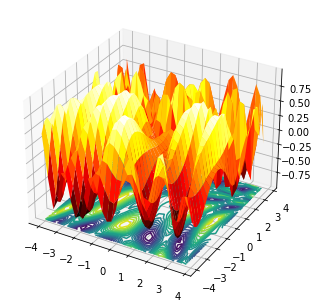

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sin(0.5*X**2 - 0.25*Y**2 + 3)*np.cos(2*X + 1 - np.exp(Y))
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')
ax.contour(X, Y, R, 20, lw=3,  linestyles="solid", offset=-1)

plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


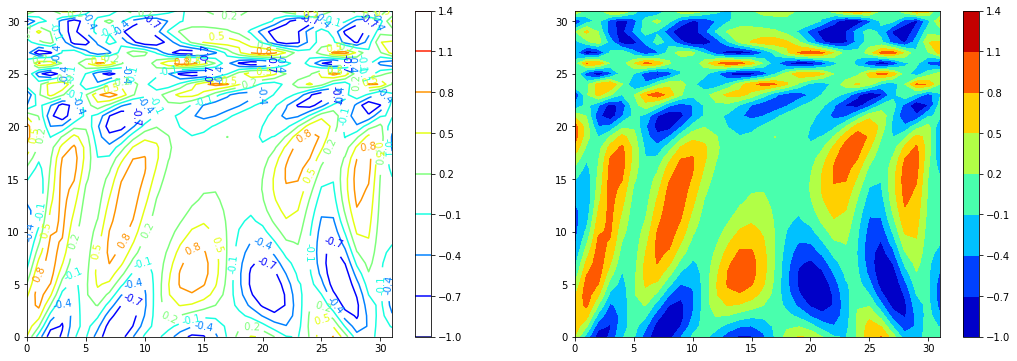

In [8]:
def process_signals(x,y):  #process_signals
    return np.sin(0.5*X**2 - 0.25*Y**2 + 3)*np.cos(2*X + 1 - np.exp(Y))

x = X
y = Y
X,Y = np.meshgrid(x,y)
Z = R
N = np.arange (-1,1.5,0.3) 
fig = plt.figure (1, (18,6)) 
fig.add_subplot (121) 
CS = plt.contour (Z, N, linewidth = 2, cmap = mpl.cm.jet)
plt.clabel (CS, inline = True, fmt = '% 1.1f', fontsize = 10) 
plt.colorbar (CS) 
fig.add_subplot (122) 
CS = plt.contourf (Z, N, linewidth = 2, cmap = mpl.cm.jet) 
plt.colorbar (CS) 
plt.show()

2. Determine el valor mínimo de la funcion con el metodo del gradiente descendente.

In [9]:
def Rx(x,y):
    return  x*np.cos(1 -np.exp(y) + 2*x)*np.cos(3 + x**2/2 - y**2/4) - 2*np.sin(1 - np.exp(y) + 2*x)*np.sin(3 + x**2/2 - y**2/4)

def Ry(x,y):
    return  np.exp(y)*np.sin(1 - np.exp(y) + 2*x)*np.sin(3 + x**2/2 - y**2/4) -1/2*y*np.cos(1 - np.exp(y) + 2*x)*np.cos(3 + x**2/2 - y**2/4)


def Gradient_descent(x, y, alpha, fp_x, fp_y):
    '''Metodo del gradiente descendente cuando hay dos variables usando cada una de las derivadas parciales'''
    return x - alpha*fp_x(x, y), y - alpha*fp_y(x, y)



In [10]:
def gradient_iteration(alpha, x_i, y_i, F_x, F_y, N):
    '''Metodo en el que se usa el gradiente descendente de manera iterativa'''
    X = [x_i]
    Y = [y_i]
    for i in range(N):
        #llamamos al metodo para obtener los nuevos valores
        x_i, y_i = Gradient_descent(x_i, y_i, alpha, F_x, F_y)
        X.append(x_i)
        Y.append(y_i)
        #miramos si las derivadas se acercan razonablemente a cero antes de que terminen las iteraciones
        if(abs(F_x(x_i, y_i)) < 1e-4 and abs(F_y(x_i, y_i))):
            break
    return X, Y, i


In [15]:
# Valores iniciales
alpha = 0.007
#
xo = 2.0 #x inicial
yo = 2.0 #y inicial

N = 100 #number of iterations

X, Y, i = gradient_iteration(alpha, xo, yo, Rx, Ry, N)


In [16]:
X_, Y_= np.meshgrid(X, Y)
Z = process_signals(X_,Y_) 

print(i+1, process_signals(X[-1], Y[-1]))
print(Z.min())
print(100*abs((process_signals(X[-1], Y[-1])-Z.min())/Z.min()))


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'